# Create a plot of Idaho Confirmed COVID-19 Cases as of Yesterday

### 1. Load the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Get the range of dates and location of the data to munge

In [2]:
covid_daily_reports = 'csse_covid_19_data/csse_covid_19_daily_reports/'

day_shift=0

id_firstday = '3/13/2020'
id_today = pd.datetime.strftime(pd.datetime.now() - pd.Timedelta(days=day_shift), '%m-%d-%Y')

date_range = pd.date_range(start=id_firstday, end=id_today)

### 3. Create arrays for numbers of confirmed and recovered cases, and deaths

In [3]:
ID_confirmed = np.zeros((date_range.size,1))
ID_deaths    = np.zeros((date_range.size,1))
ID_recovered = np.zeros((date_range.size,1))
ID_active    = np.zeros((date_range.size,1))

day = 0

for date in date_range:
    covid_daily_data = pd.read_csv(covid_daily_reports+date.strftime('%m-%d-%Y') + '.csv')
    # Note the daily reports changed from 3/22/2020 onward such that the Province or State label was 
    # Provice_State rather than Province/State. Hence the branch below.
    if date <= pd.to_datetime('03-21-2020'):
        PS_label = "Province/State"
    elif date > pd.to_datetime('03-21-2020'):
        PS_label = "Province_State"

    covid_id_daily = covid_daily_data.loc[covid_daily_data[PS_label]=="Idaho"]
    
    ID_confirmed[day] = covid_id_daily["Confirmed"].sum()
    ID_deaths[day]    = covid_id_daily["Deaths"].sum()
    ID_recovered[day] = covid_id_daily["Recovered"].sum()
    
    day = day + 1

### 4. Create a plot of the time series of data and save it

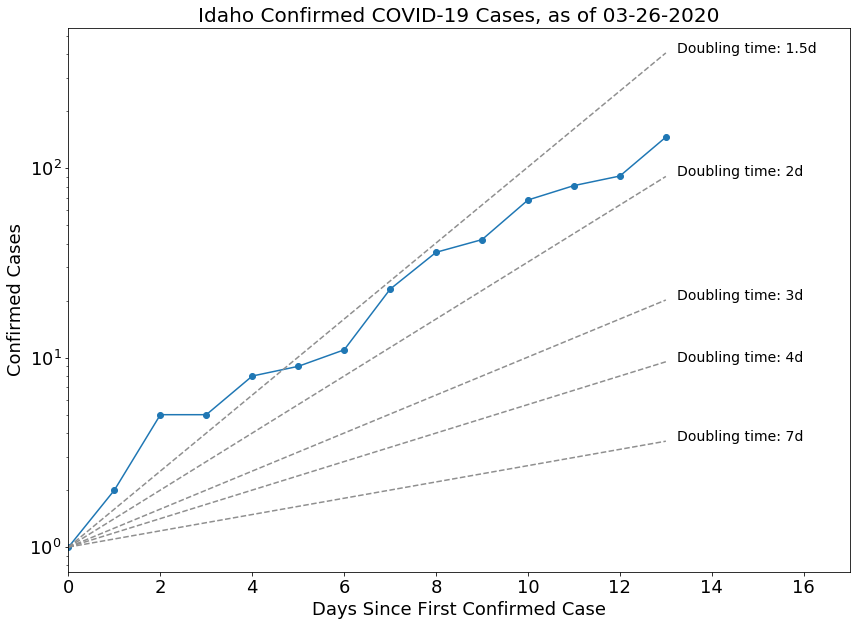

In [4]:
days_since_first = np.arange(date_range.size)

dt_1p5day = 2.0 ** (days_since_first / 1.5)
dt_2day = 2.0 ** (days_since_first / 2.0)
dt_3day = 2.0 ** (days_since_first / 3.0)
dt_4day = 2.0 ** (days_since_first / 4.0)
dt_7day = 2.0 ** (days_since_first / 7.0)

fig = plt.figure(figsize=(14,10))
plt.plot(days_since_first,ID_confirmed,'o-')

plt.plot(days_since_first,dt_1p5day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_1p5day[-1],'Doubling time: 1.5d',fontsize=14)

plt.plot(days_since_first,dt_2day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_2day[-1],'Doubling time: 2d',fontsize=14)

plt.plot(days_since_first,dt_3day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_3day[-1],'Doubling time: 3d',fontsize=14)

plt.plot(days_since_first,dt_4day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_4day[-1],'Doubling time: 4d',fontsize=14)

plt.plot(days_since_first,dt_7day,'--',color='#8f8f8f')
plt.text(days_since_first[-1]+0.25,dt_7day[-1],'Doubling time: 7d',fontsize=14)

plt.xlim((0,date_range.size+3))

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Idaho Confirmed COVID-19 Cases, as of '+date_range[-1].strftime('%m-%d-%Y'),fontsize=20)
plt.xlabel('Days Since First Confirmed Case',fontsize=18)
plt.ylabel('Confirmed Cases',fontsize=18)
plt.yscale('log')

fig.savefig('ID-COVID-19_'+date_range[-1].strftime('%m-%d-%Y')+'.png', facecolor=fig.get_facecolor(), edgecolor='none')
